<a href="https://colab.research.google.com/github/maddocbf/GooFit/blob/master/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DE = Defensive End,
DT = Defensive Tackle,
CB = Cornerback,
FS = Free Saftey,
LB = Linebacker,
SS = Strong Saftey

"Offense Roles"
RB = Running Back, 
QB = Quarterback,
WR = Wide Reciever, 
TE = Tight End

"Defense Roles"
LT = Left Tackle,
LG = Left Gaurd, 
C = Center, 
RG = Right Gaurd, 
RT = Right Tackle

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
import re

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

from google.colab import drive 
drive.mount('/content/gdrive')

data = pd.read_csv('/content/gdrive/My Drive/nfl/Kay-Gull Comp/train.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I want to see what just one data entry looks like

In [0]:
print(data.iloc[0])

GameId                                  2017090700
PlayId                              20170907000118
Team                                          away
X                                            73.91
Y                                            34.84
S                                             1.69
A                                             1.13
Dis                                            0.4
Orientation                                  81.99
Dir                                         177.18
NflId                                       496723
DisplayName                             Eric Berry
JerseyNumber                                    29
Season                                        2017
YardLine                                        35
Quarter                                          1
GameClock                                 14:14:00
PossessionTeam                                  NE
Down                                             3
Distance                       

First, let's make a list possible things we need to fix. In order to do this we will list all the variable counts as to help inconsistencies. We will start with non-numerical entries

This gives us some fixes: 

Team Abbrevations (done)

Positions

Stadium Names (probably don't care)

Location (probably don't care)

Game Weather

Stadium Type (done)

Wind Direction



In [0]:
#"DisplayName", "Team", "PossessionTeam", "HomeTeamAbbr", "VisitorTeamAbbr","Stadium", "Location", 
non_numerical = ["FieldPosition", "OffenseFormation", "PlayDirection", "Position", "StadiumType", "GameWeather", "WindDirection"]
for col in non_numerical:
  print(data[col].value_counts());

BUF    17468
OAK    17182
NYG    17160
ARZ    17072
MIA    16984
NYJ    16896
CLV    16676
CIN    16588
DEN    16566
SF     16456
SEA    16412
HST    16346
CHI    16060
IND    16038
TEN    15972
GB     15862
LA     15818
JAX    15620
DAL    15576
WAS    15554
DET    15444
BLT    15356
TB     15246
MIN    15158
LAC    15114
ATL    14938
KC     14784
NE     14718
PIT    14366
PHI    13442
NO     13332
CAR    13134
Name: FieldPosition, dtype: int64
SINGLEBACK    225434
SHOTGUN       150964
I_FORM        106062
PISTOL         13420
JUMBO          11462
WILDCAT         1782
EMPTY            506
ACE               22
Name: OffenseFormation, dtype: int64
left     256454
right    253308
Name: PlayDirection, dtype: int64
CB     56686
WR     53325
G      42114
T      42046
DE     35890
DT     35637
OLB    34110
TE     33237
FS     24607
C      24062
RB     23908
QB     23290
SS     20540
ILB    18541
MLB    10208
NT      8226
LB      6699
OT      6097
FB      3211
OG      3073
DB      1931
S     

Find the problematic team abbreviations

In [0]:
setA = data['PossessionTeam'].value_counts()
setA = setA.index.tolist()
setB = data['HomeTeamAbbr'].value_counts()
setB = setB.index.tolist()

print(np.setdiff1d(setA, setB))
print(setB)

First, Let's change the heights to all out of inches 

In [0]:
def convert_heights(txt):
  ft, inch = txt.split("-")
  return int(ft)*12 + int(inch)
  
data["PlayerHeight"] = data["PlayerHeight"].apply(convert_heights)

In [0]:
def clean_abbrevs(txt):
  txt = txt.replace('CLV', 'CLE')
  txt = txt.replace('BLT', 'BAL')
  txt = txt.replace('ARZ', 'ARI')
  txt = txt.replace('HST', 'HOU')
data = data.apply(clean_abbrevs)


In [0]:
def clean_StadiumType(txt):
    if pd.isna(txt):
        return np.nan
    txt = txt.lower()
    txt = ''.join([c for c in txt if c not in punctuation])
    txt = re.sub(' +', ' ', txt)
    txt = txt.strip()
    txt = txt.replace('outside', 'outdoor')
    txt = txt.replace('outdor', 'outdoor')
    txt = txt.replace('outddors', 'outdoor')
    txt = txt.replace('outdoors', 'outdoor')
    txt = txt.replace('oudoor', 'outdoor')
    txt = txt.replace('indoors', 'indoor')
    txt = txt.replace('ourdoor', 'outdoor')
    txt = txt.replace('retractable', 'rtr.')
    txt = txt.replace('dome closed', 'indoor')
    txt = txt.replace('closed dome', 'indoor')
    txt = txt.replace('open', 'outdoor')
    txt = txt.replace('indoor roof closed','indoor')
    txt = txt.replace('outdoor retr roofopen', 'outdoor')
    txt = txt.replace('indoor open roof', 'outdoor')
    txt = txt.replace('cloudy', 'outdoor')
    txt = txt.replace('outdoor retr roofoutdoor', 'outdoor')
    txt = txt.replace('retr roof closed', 'indoor')
    txt = txt.replace('retr roofclosed', 'indoor')
    txt = txt.replace('indoor outdoor roof', 'rtr roof')
    txt = txt.replace('domed closed', 'indoor')
    txt = txt.replace('domed outdoor', 'outdoor')
    txt = txt.replace('domed', 'rtr roof')
    txt = txt.replace('dome', 'rtr roof')
    txt = txt.replace('retr roofoutdoor', 'outdoor')
    txt = txt.replace('heinz field', 'outdoor')
    txt = txt.replace('retr roof outdoor', 'outdoor')
    return txt
data['StadiumType'] = data['StadiumType'].apply(clean_StadiumType)

In [0]:
data['Position'].value_counts()

TE     75283
CB     56686
WR     53325
SA     48738
G      42114
DE     35890
DT     35637
OLB    34110
C      24062
RB     23908
QB     23290
ILB    18541
MLB    10208
NT      8226
LB      6699
OT      6097
FB      3211
OG      3073
HB       647
DLB       17
Name: Position, dtype: int64

In [0]:
def clean_Position(txt):
  if txt == 'T':
    txt = txt.replace('T', 'TE')
  if txt == 'S':
    txt = txt.replace('S', 'SA')
  if txt == 'SS':
    txt = txt.replace('SS', 'SA')
  if txt == 'FS':
    txt = txt.replace('FS', 'SA')
  if txt == 'DB':
    txt = txt.replace('DB', 'SA')
  if txt == 'DL':
    txt = txt.replace('DL', 'DLB')
  if txt == 'SAF':
    txt = txt.replace('SAF', 'SA')
  if txt == 'DE':
    txt = txt.replace('T', 'TE')


  return txt
data['Position'] = data['Position'].apply(clean_Position)

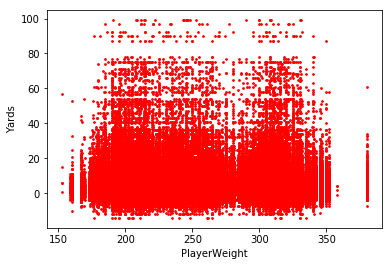

In [0]:
data.plot(kind='scatter',x='PlayerWeight',y='Yards',color='red',s=3)

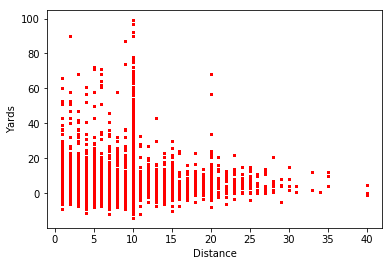

In [0]:
data.plot(kind='scatter',x='Distance',y='Yards',color='red', s = 3)

In [0]:
playsAtDistance = np.zeros(199)
for i in range(-99, 99):
  #print(data[data.Distance==i].shape[0])
  playsAtDistance[i+99] = data[data.Distance==i].shape[0]
print(playsAtDistance)

playsAtYards = np.zeros(199)
for i in range(-99, 99):
  #print(data[data.Distance==i].shape[0])
  playsAtYards[i+99] = data[data.Yards==i].shape[0]
print(playsAtYards)

[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.

In [0]:
print(data.OffenseFormation.unique())
print(data.DefensePersonnel.unique())
print(data.Distance.unique())
print(data.PlayDirection.unique())

['SHOTGUN' 'SINGLEBACK' 'JUMBO' 'PISTOL' 'I_FORM' 'ACE' 'WILDCAT' nan
 'EMPTY']
['2 DL, 3 LB, 6 DB' '4 DL, 4 LB, 3 DB' '3 DL, 2 LB, 6 DB'
 '3 DL, 4 LB, 4 DB' '3 DL, 3 LB, 5 DB' '4 DL, 3 LB, 4 DB'
 '4 DL, 1 LB, 6 DB' '4 DL, 2 LB, 5 DB' '5 DL, 2 LB, 4 DB'
 '2 DL, 4 LB, 5 DB' '2 DL, 5 LB, 4 DB' '5 DL, 4 LB, 2 DB'
 '1 DL, 5 LB, 5 DB' '5 DL, 3 LB, 3 DB' '6 DL, 2 LB, 3 DB'
 '3 DL, 5 LB, 3 DB' '6 DL, 3 LB, 2 DB' '1 DL, 3 LB, 7 DB'
 '2 DL, 2 LB, 7 DB' '4 DL, 5 LB, 2 DB' '1 DL, 4 LB, 6 DB'
 '4 DL, 5 LB, 1 DB, 1 OL' '6 DL, 1 LB, 4 DB' '2 DL, 4 LB, 4 DB, 1 OL'
 '6 DL, 4 LB, 1 DB' '5 DL, 1 LB, 5 DB' '4 DL, 6 LB, 1 DB'
 '0 DL, 5 LB, 6 DB' '5 DL, 4 LB, 1 DB, 1 OL' '3 DL, 1 LB, 7 DB'
 '4 DL, 0 LB, 7 DB' '3 DL, 4 LB, 3 DB, 1 OL' '5 DL, 5 LB, 1 DB'
 '5 DL, 3 LB, 2 DB, 1 OL' '0 DL, 6 LB, 5 DB' '1 DL, 2 LB, 8 DB'
 '0 DL, 4 LB, 7 DB' '7 DL, 2 LB, 2 DB']
[ 2 10  7  1  9  5  6 14  8 12  3  4 15 21 17 20 13 16 11 23 19 26 24 18
 25 30 31 28 27 40 35 33 22 34 29]
['left' 'right']


In [0]:
print(data[data.Yards==99])

            GameId          PlayId  Team      X      Y     S     A   Dis  \
447216  2018120600  20181206001238  away  10.36  21.05  1.08  2.44  0.12   
447217  2018120600  20181206001238  away  11.93  23.18  0.50  0.54  0.04   
447218  2018120600  20181206001238  away  11.60  32.03  3.70  4.11  0.35   
447219  2018120600  20181206001238  away  12.01  25.12  0.79  0.93  0.08   
447220  2018120600  20181206001238  away  26.68  25.29  1.94  3.29  0.18   
447221  2018120600  20181206001238  away  13.98  27.15  2.98  1.08  0.29   
447222  2018120600  20181206001238  away  13.70   9.57  3.40  2.42  0.33   
447223  2018120600  20181206001238  away  13.65  23.82  2.47  0.35  0.24   
447224  2018120600  20181206001238  away  11.52  26.51  1.34  1.48  0.13   
447225  2018120600  20181206001238  away  10.65  17.63  2.89  2.17  0.29   
447226  2018120600  20181206001238  away  11.37  28.67  2.72  1.13  0.27   
447227  2018120600  20181206001238  home  10.83  26.72  2.47  0.85  0.24   
447228  2018